In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import qutip as qt

# Introduction to Quantum Optics

## Example: Photons in a cavity

# Cavity 

What is a photon and how do we think about it? We can start with a cavity. Below is a *nanobeam cavity*. It is essentially a beam of a material with a high index of refraction surrounded by air. The light travels through the beam. There are three groups of holes. Each group of holes acts like a mirror. The space in between the two mirrors is a cavity. Light reflects from the first mirror but some of it leaks into the cavity. The light that leaks into the cavity gets trapped and stays for a long time until it leaks out of the sides. 

<!-- %%html -->
<video width="560" height="315" controls>
  <source src="cavity_res.mp4" type="video/mp4">
Your browser does not support the video tag.
</video>

### The Hamiltonian

$\hat{n}$ is the number operator. It counts the number of photons in the cavity. $\hat{a}$ is the annihilation operator. It removes a photon from the cavity. $\hat{a}^\dagger$ is the creation operator. It adds a photon to the cavity.

$$
H = \hbar \omega_0 \left( \hat{n} + \frac{1}{2} \right) 
$$

The decay operator is $\hat{a}$. It removes a photon from the cavity. The decay rate is $\kappa$. The decay rate is the rate at which photons leak out of the cavity. You might notice that even when there are no photons, there is still some energy in the cavity. This is called the *zero point energy*. It is the energy of the vacuum.


Total run time:   0.00s
10.0%. Run time:   5.05s. Est. time left: 00:00:00:45
20.0%. Run time:   5.07s. Est. time left: 00:00:00:20
30.0%. Run time:   5.08s. Est. time left: 00:00:00:11
40.0%. Run time:   5.11s. Est. time left: 00:00:00:07
50.0%. Run time:   5.13s. Est. time left: 00:00:00:05
60.0%. Run time:   5.14s. Est. time left: 00:00:00:03
70.0%. Run time:   5.20s. Est. time left: 00:00:00:02
80.0%. Run time:   5.20s. Est. time left: 00:00:00:01
90.0%. Run time:   5.22s. Est. time left: 00:00:00:00
100.0%. Run time:   5.26s. Est. time left: 00:00:00:00
Total run time:   5.34s
10.0%. Run time:   5.71s. Est. time left: 00:00:00:51
20.0%. Run time:   6.07s. Est. time left: 00:00:00:24
30.0%. Run time:   6.43s. Est. time left: 00:00:00:14
40.0%. Run time:   6.88s. Est. time left: 00:00:00:10
50.0%. Run time:   7.31s. Est. time left: 00:00:00:07
60.0%. Run time:   7.74s. Est. time left: 00:00:00:05
70.0%. Run time:   8.16s. Est. time left: 00:00:00:03
80.0%. Run time:   8.53s. Est. ti

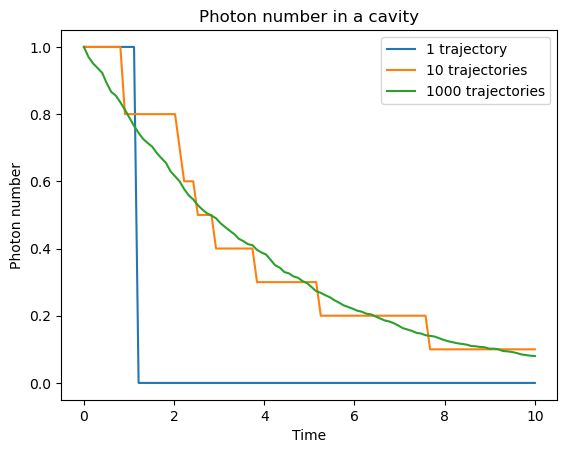

In [14]:
# Define the Hamiltonian
N = 1 + 1  # number of photon states
H = qt.num(N) + 1/2

gamma = 0.25  # decay rate
c_ops = [np.sqrt(gamma) * qt.destroy(N)]

# Define the initial state
psi0 = qt.basis(N, N - 1)

# Define the time vector
t = np.linspace(0, 10, 100)

# Solve with monte carlo
res1 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=1)
res2 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=10)
res3 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=1000)

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, res1.expect[0], label='1 trajectory')
ax.plot(t, res2.expect[0], label='10 trajectories')
ax.plot(t, res3.expect[0], label='1000 trajectories')
ax.set_xlabel('Time')
ax.set_ylabel('Photon number')
ax.set_title('Photon number in a cavity')
ax.legend()

## A driven cavity

### The Hamiltonian

We can drive the cavity with a term that creates photons at a certain rate $\Omega a^\dagger$. The rate is called the *Rabi frequency*. 

$$
H_D = \hbar \Omega \left( a^\dagger + a \right)
$$

10.0%. Run time:   3.61s. Est. time left: 00:00:00:32
20.0%. Run time:   3.92s. Est. time left: 00:00:00:15
30.0%. Run time:   4.25s. Est. time left: 00:00:00:09
40.0%. Run time:   4.56s. Est. time left: 00:00:00:06
50.0%. Run time:   4.86s. Est. time left: 00:00:00:04
60.0%. Run time:   5.15s. Est. time left: 00:00:00:03
70.0%. Run time:   5.42s. Est. time left: 00:00:00:02
80.0%. Run time:   5.71s. Est. time left: 00:00:00:01
90.0%. Run time:   5.99s. Est. time left: 00:00:00:00
100.0%. Run time:   6.26s. Est. time left: 00:00:00:00
Total run time:   6.30s


Text(0.5, 1.0, 'Photon number in a cavity')

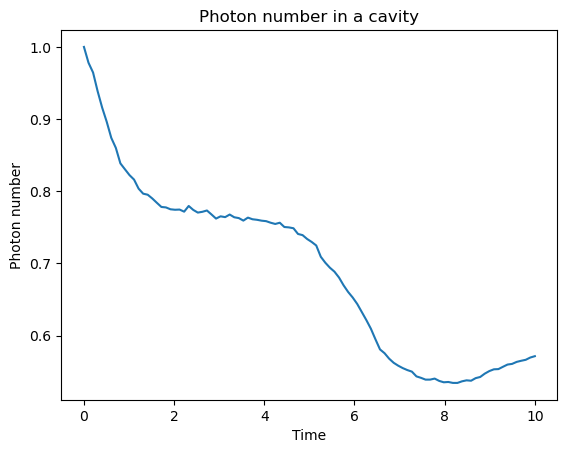

In [20]:
# Define the Hamiltonian
N = 1 + 1  # number of photon states
Omega = 1  # Rabi frequency
H_0 = qt.num(N) + 1/2
H_D = Omega* (qt.destroy(N) + qt.create(N))
H = H_0 + H_D

gamma = 0.25  # decay rate
c_ops = [np.sqrt(gamma) * qt.destroy(N)]

# Define the initial state
psi0 = qt.basis(N, N - 1)

# Define the time vector
t = np.linspace(0, 10, 100)

# Solve with monte carlo
res3 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=1000)

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, res3.expect[0], label='1000 trajectories')
ax.set_xlabel('Time')
ax.set_ylabel('Photon number')
ax.set_title('Photon number in a cavity')

## Example: An atom

### An oscillating dipole 

lorem ipsum

<!-- <video width="560" height="315" controls>
  <source src="atom.mp4" type="video/mp4">
Your browser does not support the video tag.
</video> -->

### The Hamiltonian for an atom

The $\sigma_z$ operator gives the Pauli matrix. It gives $+1$ for an atom in the excited state and $-1$ for an atom in the ground state. 

$$
H = \hbar \omega_0 \sigma_z
$$

The decay operator is $\sigma$, the destruction operator. 

10.0%. Run time:   4.70s. Est. time left: 00:00:00:42
20.0%. Run time:   4.73s. Est. time left: 00:00:00:18
30.0%. Run time:   4.76s. Est. time left: 00:00:00:11
40.0%. Run time:   4.79s. Est. time left: 00:00:00:07
50.0%. Run time:   4.82s. Est. time left: 00:00:00:04
60.0%. Run time:   4.85s. Est. time left: 00:00:00:03
70.0%. Run time:   4.89s. Est. time left: 00:00:00:02
80.0%. Run time:   4.92s. Est. time left: 00:00:00:01
90.0%. Run time:   4.96s. Est. time left: 00:00:00:00
100.0%. Run time:   5.27s. Est. time left: 00:00:00:00
Total run time:   5.33s


Text(0.5, 1.0, 'Excitation probability of a qubit')

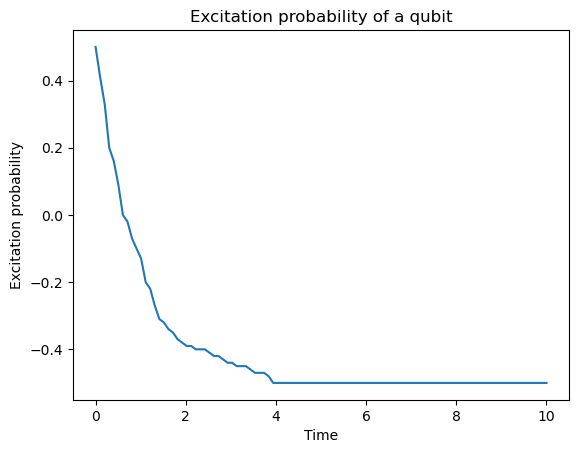

In [16]:
# Define the Hamiltonian
H = qt.sigmaz() / 2

# Define the decay
gamma = 1.  # decay rate

# Define the initial state
psi0 = qt.basis(2, 0)  # excited state

# Define the time vector
t = np.linspace(0, 10, 100)

# Solve with monte carlo
res1 = qt.mcsolve(H, psi0, t, [np.sqrt(gamma) * qt.sigmam()], [H], ntraj=100)

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, res1.expect[0], label='100 trajectory')
ax.set_xlabel('Time')
ax.set_ylabel('Excitation probability')
ax.set_title('Excitation probability of a qubit')

# Appendix 

## Formalism of quantum optics 

The formalism of quantum optics is very intuitive. Everything is written in terms of matrices. The Hamiltonian $\hat{H}$ is matrix that acts as the *energy* operator. The Hamiltonian tells you about the time evolution of the system via the *Schr&ouml;dinger equation*. 

$$
\hat{H} \left| \psi \right> = -\frac{\partial}{\partial t} \left| \psi \right>
$$

Here, E is the energy. Note that $\hat{H}$ is a matrix, $\left| \psi \right>$ is a vector (actually, it's a ray, but they're pretty much the same), and $E$ is a number. The solution to this gives you a wavefunction $\left| \psi \right>$ with some time evolution and energy. 